# Exploratory Data Analysis

In [1]:
%matplotlib inline

# filter warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.util import ngrams
from collections import Counter
from nltk.probability import FreqDist

plt.rcParams.update({'font.size': 18})

In [2]:
# Import custom class
%run -i '../src/text_preprocessing.py'

In [3]:
# Instantiate the class
transfxn = TextPreprocessing()

# Load data

In [4]:
df = pd.read_csv('../data/data_processed.csv', sep = '\t')
print('Data size', df.shape)
df.head()

Data size (295174, 20)


,abstract,arXiv_id,authors,categories,comments,date_created,doi,title,num_of_authors,year,month,day_of_week,num_of_pages,num_of_figures,length_of_abstr,citation_count,p_age,wday_ct,month_ct,year_ct
0,We study the two-particle wave function of p...,704.0006,"['PongY. H.', 'LawC. K.']",['cond-mat.mes-hall'],"6 pages, 4 figures, accepted by PRA",2007-03-31,10.1103/PhysRevA.75.043613,Bosonic characters of atomic Cooper pairs acro...,2,2007,March,Saturday,6.0,4.0,918,13,13,14925,25778,10406
1,A general formulation was developed to repre...,704.0008,['SwiftDamian C.'],['cond-mat.mtrl-sci'],Minor corrections,2007-03-31,10.1063/1.2975338,Numerical solution of shock and ramp compressi...,1,2007,March,Saturday,NaN,NaN,949,12,13,14925,25778,10406
2,We present recent advances in understanding ...,704.0025,"[""MishchenkoA. S.CREST, Japan Science and Tech...","['cond-mat.str-el', 'cond-mat.stat-mech']","41 pages, 13 figures, in ""Polarons in Advanced...",2007-04-02,10.1007/978-1-4020-6348-0_12,Spectroscopic Properties of Polarons in Strong...,2,2007,April,Monday,41.0,13.0,655,5,13,54239,23902,10406
3,We describe a peculiar fine structure acquir...,704.0027,"['GoerbigM. O.', 'FuchsJ. -N.', 'KechedzhiK.',...",['cond-mat.mes-hall'],"4 pages, 2 figures; mistakes due to an erroneo...",2007-04-02,10.1103/PhysRevLett.99.087402,Filling-Factor-Dependent Magnetophonon Resonan...,4,2007,April,Monday,4.0,2.0,618,70,13,54239,23902,10406
4,We investigate the effect of tuning the phon...,704.003,"['HagueJ. P.', ""d'AmbrumenilN.""]",['cond-mat.str-el'],"Reprint to improve access. 13 pages, 6 figures.",2007-03-31,10.1007/s10909-005-6013-6,Tuning correlation effects with electron-phono...,2,2007,March,Saturday,13.0,6.0,779,2,13,14925,25778,10406


In [5]:
# re-encode variables
month_dict = {
    'January':'Jan', 'February':'Feb', 'March':'Mar', 'April':'Apr',
    'May':'May', 'June':'Jun', 'July':'Jul','August':'Aug',
    'September':'Sep', 'October':'Oct', 'November':'Nov',
    'December':'Dec' 
              }

day_dict = {
    'Sunday':'Sun', 'Saturday':'Sat', 'Monday':'Mon', 
    'Tuesday':'Tue', 'Wednesday':'Wed', 'Thursday':'Thur', 
    'Friday':'Fri'
    }

df['day_of_week'].replace(day_dict, inplace=True)
df['month'].replace(month_dict, inplace=True)

# rename columns
col_dict = {
    "day_of_week": "posted_day", 'month': 'posted_month', 
    'year':'posted_year'
    }
df.rename(columns=col_dict, inplace=True)

# Data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295174 entries, 0 to 295173
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   abstract         295174 non-null  object 
 1   arXiv_id         295174 non-null  object 
 2   authors          295174 non-null  object 
 3   categories       295174 non-null  object 
 4   comments         295173 non-null  object 
 5   date_created     295174 non-null  object 
 6   doi              295174 non-null  object 
 7   title            295174 non-null  object 
 8   num_of_authors   295174 non-null  int64  
 9   posted_year      295174 non-null  int64  
 10  posted_month     295174 non-null  object 
 11  posted_day       295174 non-null  object 
 12  num_of_pages     196991 non-null  float64
 13  num_of_figures   158440 non-null  float64
 14  length_of_abstr  295174 non-null  int64  
 15  citation_count   295174 non-null  int64  
 16  p_age            295174 non-null  int6

In [7]:
df.describe()

,num_of_authors,posted_year,num_of_pages,num_of_figures,length_of_abstr,citation_count,p_age,wday_ct,month_ct,year_ct
count,295174.000000,295174.000000,196991.000000,158440.000000,295174.000000,295174.000000,295174.000000,295174.000000,295174.000000,295174.000000
mean,3.889807,2010.527292,12.863730,6.593228,897.299322,24.929008,9.472708,48839.456158,24657.074336,13245.038696
std,2.922733,6.794057,15.897621,14.012105,351.711874,99.294934,6.794057,11700.358312,1191.903409,4308.690391
min,1.000000,1992.000000,0.000000,0.000000,7.000000,0.000000,0.000000,14925.000000,22499.000000,284.000000
25%,2.000000,2005.000000,5.000000,4.000000,639.000000,1.000000,4.000000,47270.000000,23902.000000,10239.000000
50%,3.000000,2012.000000,10.000000,5.000000,843.000000,7.000000,8.000000,54235.000000,24968.000000,14743.000000
75%,5.000000,2016.000000,16.000000,8.000000,1107.000000,23.000000,15.000000,54239.000000,25778.000000,16731.000000
max,141.000000,2020.000000,2008.000000,4989.000000,6091.000000,19719.000000,28.000000,54592.000000,26325.000000,18895.000000


# Most common words in the abstract
In condensed matter physics, we are mostly interested in models and quantum phases of matter. This is reflected in the most common words in the abstracts

In [8]:
def plot_word_count(text1, text2, num_words=None):
    """
    Plot of the most frequency words in the titles & abstracts
    
    Parameters
    ----------
    text1 & text2: string of words to be concatenated
    num_words: number of top common words to extract
    
    Returns
    --------
    Maplotlib barplot
    """
    corpus = ' '.join(text1) + ' '.join(text2) # join text1 & text2
    token_count = Counter(transfxn.sen_tokenizer(corpus)) # count each word
    common_words =  dict(token_count.most_common(n=num_words) ) # most common words
    freq_plot = pd.Series(common_words, index=None).sort_values(ascending=True)\
                                                    .plot(kind='barh', figsize=(18,10))
    plt.xlabel('Word count')
    plt.yticks(rotation=45)
    plt.title("Top {} most common words in the titles and abstracts".format(num_words))
    plt.savefig('../images/fig1a.png')

In [ ]:
plot_word_count(df['abstract'], df['title'], num_words=10)

# The most frequent week day papers are posted
Most condensed matter arXiv papers are posted on Tuesdays followed by Mondays and Wednesdays respectively

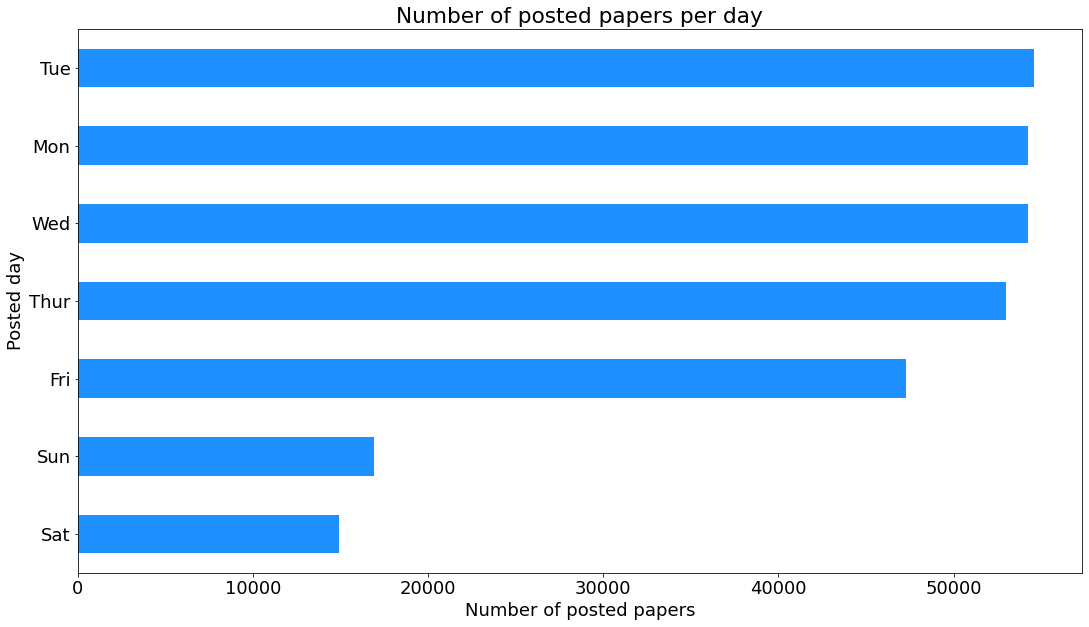

In [17]:
grp = df.groupby('posted_day')['arXiv_id'].count().sort_values(ascending=True)
grp.plot(kind = 'barh', figsize=(18,10), color = 'dodgerblue')
plt.xlabel('Number of posted papers')
plt.ylabel('Posted day')
plt.title("Number of posted papers per day")
plt.savefig('../images/fig2a.png')

# arXiv IDs with most authors and longest abstract

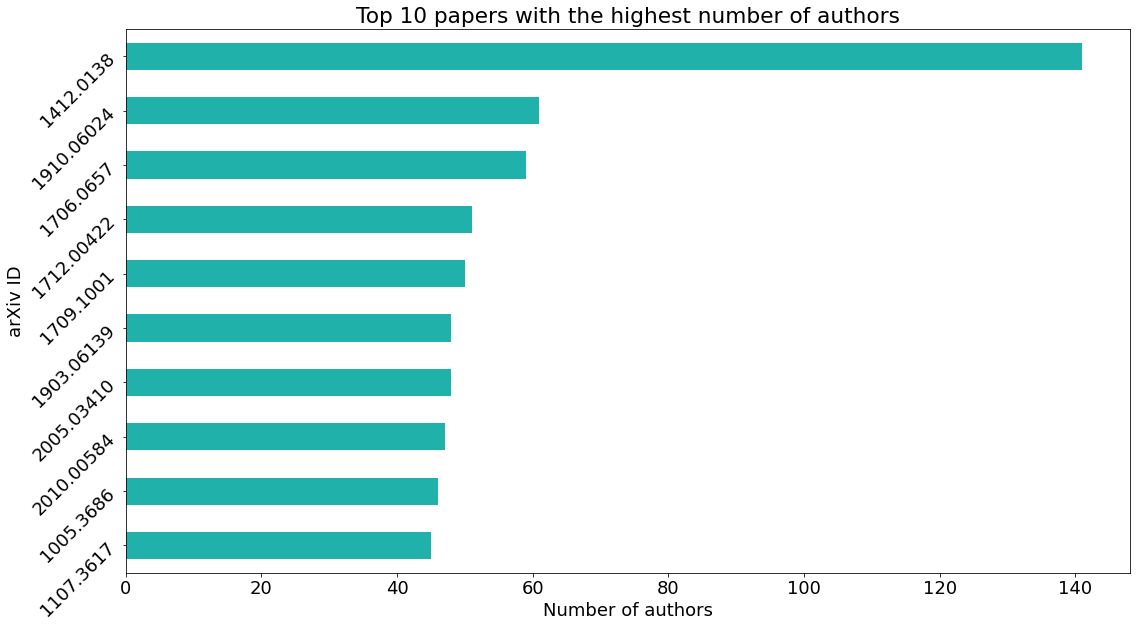

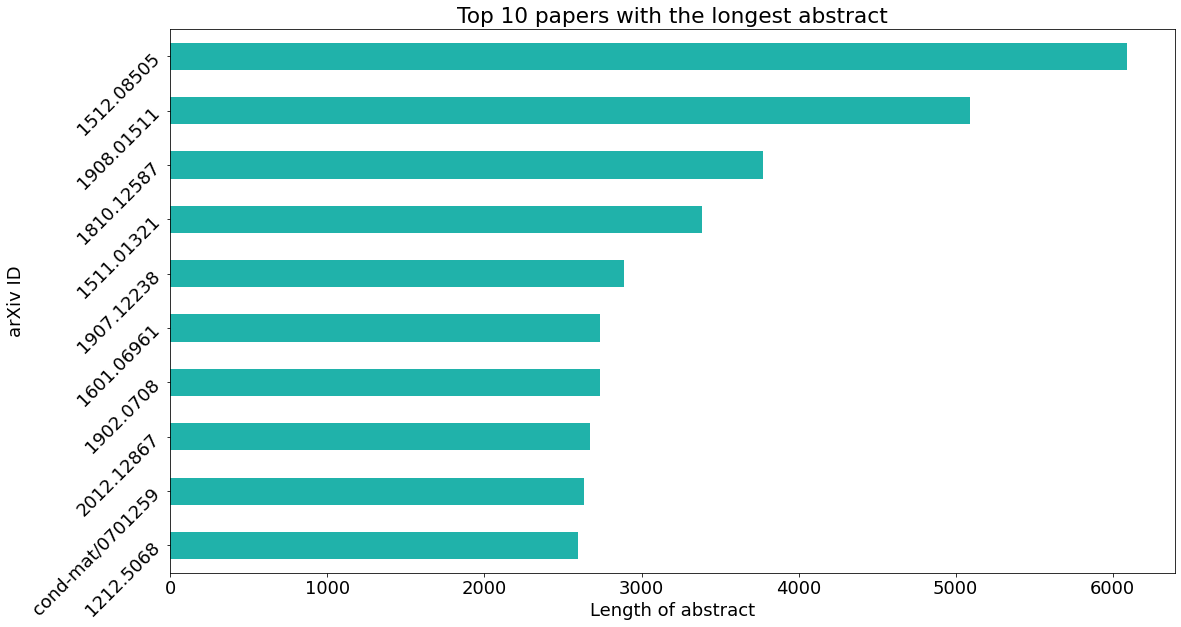

In [16]:
grp1 = df.groupby('arXiv_id')['num_of_authors'].sum().sort_values(ascending = True).tail(10)
grp2 = df.groupby('arXiv_id')['length_of_abstr'].sum().sort_values(ascending = True).tail(10)

grp1.plot(kind = 'barh', figsize = (18,10), color = 'lightseagreen')
plt.ylabel('arXiv ID')
plt.xlabel('Number of authors')
plt.yticks(rotation = 45)
plt.yticks(np.arange(len(grp1.index)), list(grp1.index))
plt.title("Top 10 papers with the highest number of authors")
plt.savefig('../images/fig2b.png')

plt.figure()
grp2.plot(kind = 'barh', figsize = (18,10), color = 'lightseagreen')
plt.ylabel('arXiv ID')
plt.xlabel('Length of abstract')
plt.yticks(rotation = 45)
plt.yticks(np.arange(len(grp2.index)), list(grp2.index))
plt.title("Top 10 papers with the longest abstract")
plt.savefig('../images/fig2c.png')

# Number of posted papers per month

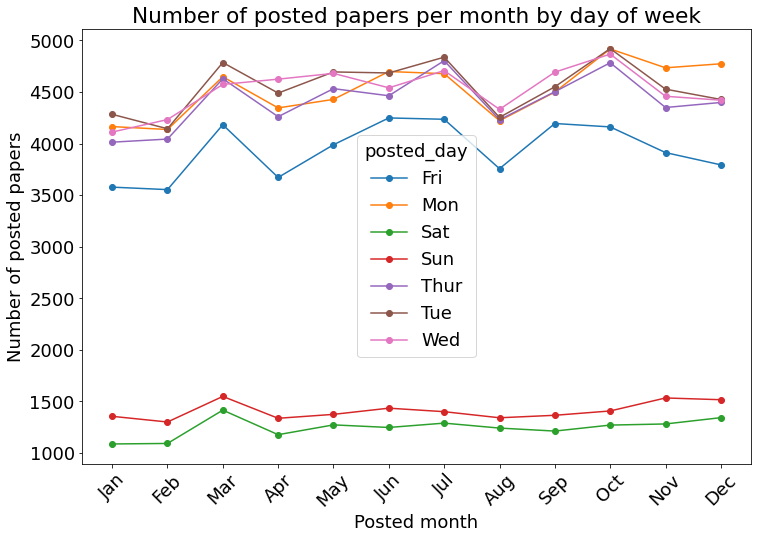

<Figure size 432x288 with 0 Axes>

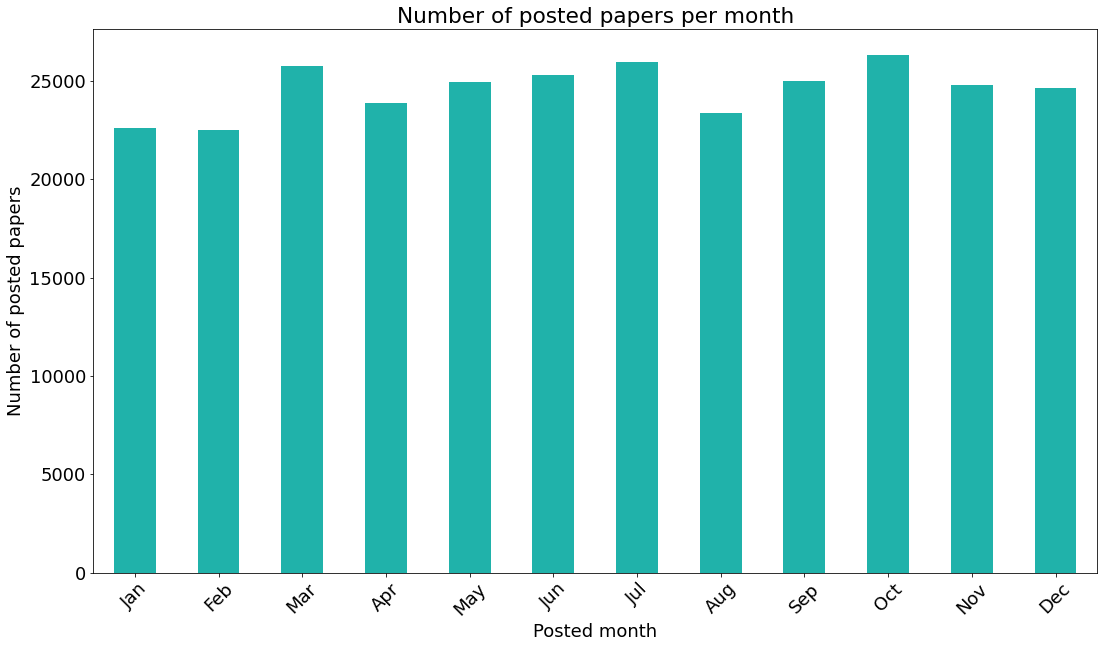

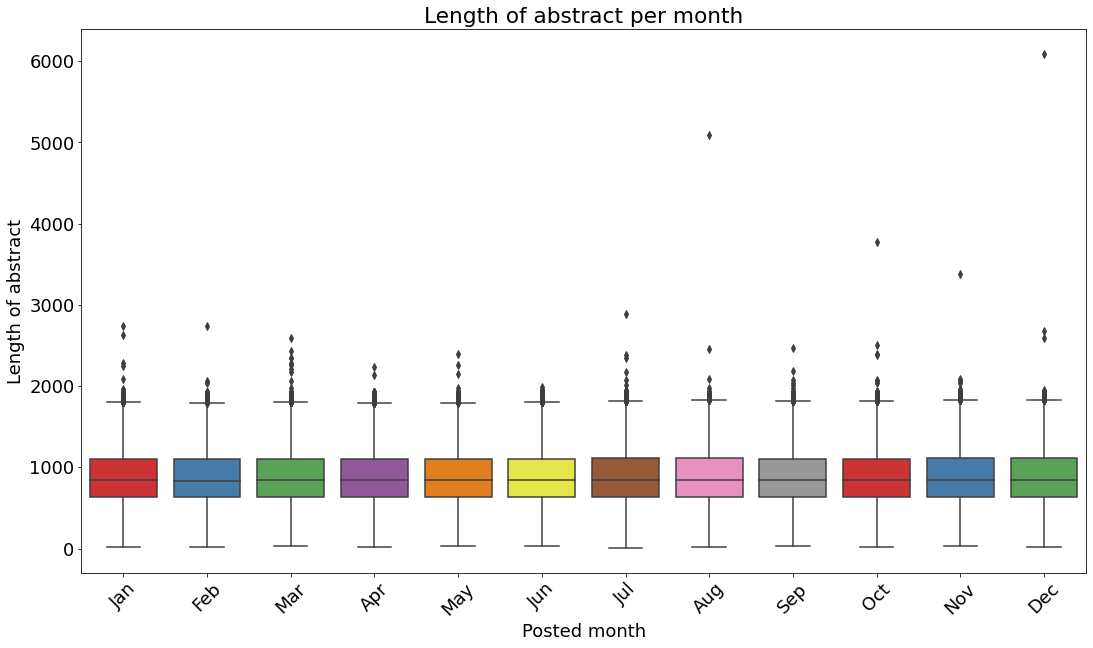

In [11]:
df_sel = df.copy()
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,  'May':5, 'Jun':6, 
              'Jul':7,'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12
             }
df_sel['posted_month'].replace(month_dict, inplace=True)

pvt1 = df_sel.pivot_table('arXiv_id', index = 'posted_month',
                          columns = 'posted_day', aggfunc = 'count'
                         )
df_box = pvt1.unstack().dropna().reset_index()
df_box.columns = ['posted_day', 'posted_month', 'artcl_ct']
df_box.sort_values(by = 'artcl_ct', ascending=True,inplace=True)

pvt = df_sel.pivot_table('arXiv_id', index = 'posted_month', aggfunc = 'count')

# plots
pvt1.plot(marker = 'o', figsize = (12,8))
plt.xticks(list(pvt1.index), list(month_dict.keys()), rotation = 45)
plt.xlabel('Posted month')
plt.ylabel('Number of posted papers')
plt.title("Number of posted papers per month by day of week")
plt.savefig('../images/fig3a.png')
plt.show()

plt.figure()
pvt.plot(kind = 'bar', figsize = (18,10), legend = False, color = 'lightseagreen')
plt.xticks(np.arange(0,12), list(month_dict.keys()))
plt.xlabel('Posted month')
plt.ylabel('Number of posted papers')
plt.title("Number of posted papers per month")
plt.xticks(rotation = 45)
plt.savefig('../images/fig3b.png')

plt.figure(figsize = (18,10))
sns.boxplot(data = df_sel, x = 'posted_month', y = 'length_of_abstr', palette = "Set1")
plt.xlabel('Posted month')
plt.ylabel('Length of abstract')
plt.xticks(np.arange(0,12), list(month_dict.keys()), rotation = 45)
plt.title("Length of abstract per month")
plt.savefig('../images/fig3c.png')

# Number of posted papers per year
The number of papers posted per year has an upward trend between 1992-2019, but declined in 2020 due to the pandemic

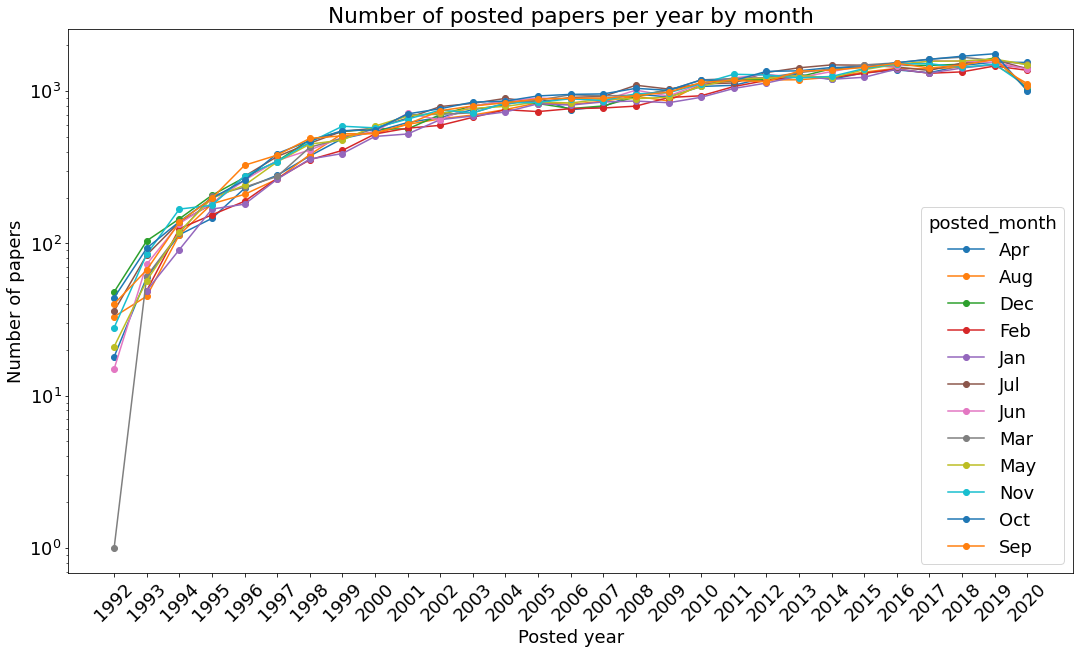

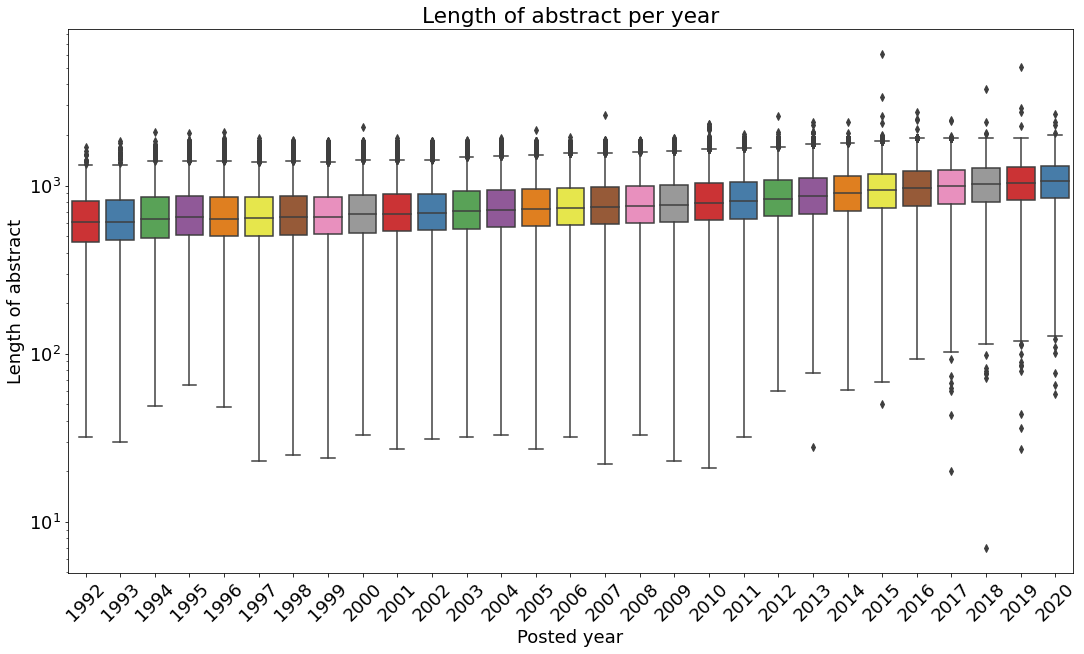

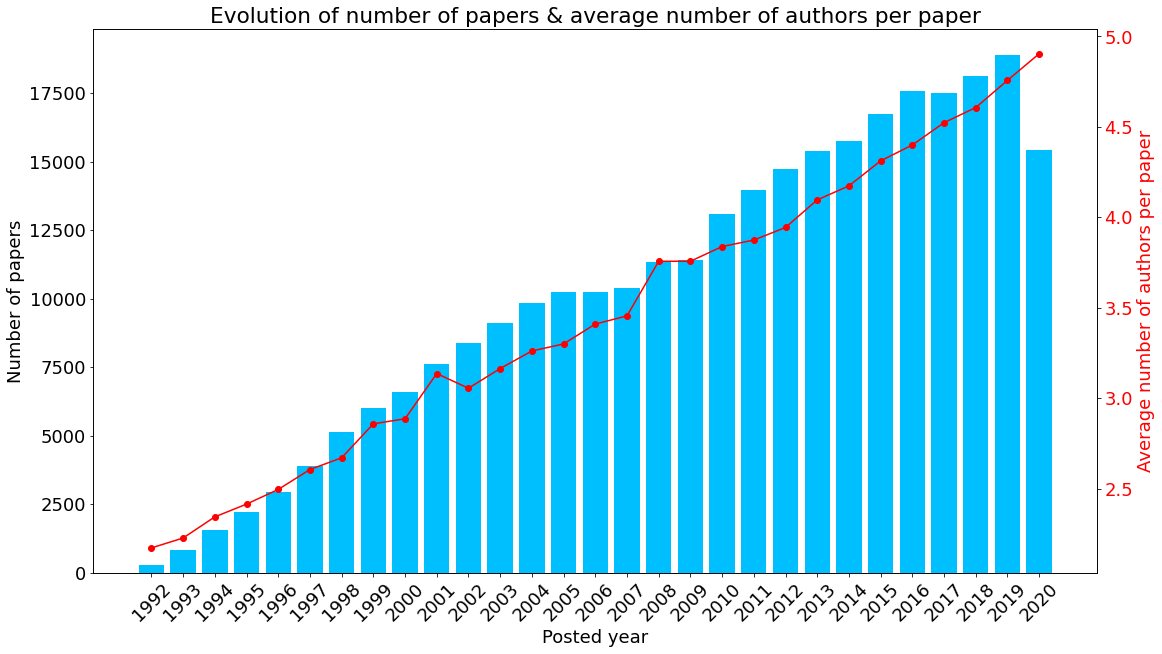

In [9]:
pvt1 = df.pivot_table('arXiv_id', index = 'posted_year', columns = 'posted_month', aggfunc = 'count')
pvt2 = df.pivot_table('arXiv_id', index = 'posted_year', aggfunc = 'count')
pvt3 = df.pivot_table('num_of_authors', index = 'posted_year', aggfunc = 'mean')
pvt = pvt2.merge(pvt3, how = 'inner', on = 'posted_year')
pvt.reset_index(level = 0, inplace = True)
pvt.rename(columns = {'arXiv_id':'num_papers'},inplace = True)

g = pvt1.plot(marker = 'o', figsize = (18,10))
g.set_yscale('log')
plt.xlabel('Posted year')
plt.ylabel('Number of papers')
plt.xticks(np.arange(1992,2021,1), rotation = 45)
plt.title("Number of posted papers per year by month")
plt.savefig('../images/fig4a.png')

plt.figure(figsize = (18,10))
g= sns.boxplot(data = df, x = 'posted_year', y = 'length_of_abstr', palette = "Set1")
g.set_yscale('log')
plt.xlabel('Posted year')
plt.ylabel('Length of abstract')
plt.xticks(rotation = 45)
plt.title("Length of abstract per year")
plt.savefig('../images/fig4b.png')

fig, ax1 = plt.subplots(figsize = (18,10))
ax2 = ax1.twinx() 
ax1.bar(np.array(pvt.posted_year), np.array(pvt.num_papers), color = 'deepskyblue')
# ax1.set_yscale('log')
ax1.set_xlabel('Posted year')
ax1.set_ylabel('Number of papers')
ax1.tick_params(axis='y')
ax1.set_xticks(np.array(pvt.posted_year))
ax1.set_xticklabels(np.array(pvt.posted_year), rotation = 45)
ax1.set_title("Evolution of number of papers & average number of authors per paper")
ax2.plot(np.array(pvt.posted_year), np.array(pvt.num_of_authors), color = 'r', marker = 'o')
ax2.set_ylabel('Average number of authors per paper', color = 'r')
ax2.tick_params(axis='y', labelcolor = 'r')
# ax2.set_yticks(np.arange(6))
plt.savefig('../images/fig4c.png')

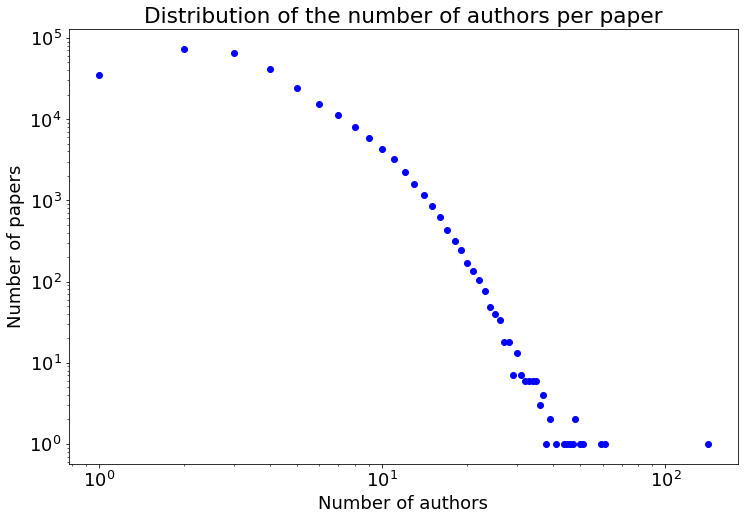

In [11]:
pvt = df.pivot_table('arXiv_id', index = 'num_of_authors', aggfunc = 'count')
pvt.reset_index(level = 0, inplace = True)

plt.figure(figsize = (12,8))
plt.loglog(pvt['num_of_authors'], pvt['arXiv_id'], linestyle = 'None',
           color = 'b', marker = "o")
plt.xlabel('Number of authors')
plt.ylabel('Number of papers')
plt.title("Distribution of the number of authors per paper")
plt.savefig('../images/fig4e.png')